In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error

In [ ]:
df_SM = pd.read_csv('SM_train.csv')

In [ ]:
df_SM

,Id,Model,Tahun,Rating,Power,Kapasitas Bahan Bakar,Jarak Sumbu Roda,Ketinggian Tempat Duduk,Bore,Stroke,...,Suspensi Belakang,Kompresi,Ban Depan,Ban Belakang,Rem Depan,Rem Belakang,Warna,Starter,Kapasitas Mesin,Kategori
0,345,Adiva Birdie,2012,2.2,9.4,5.00,1400.0,800.0,54.0,66.0,...,Monoshock,9.5:1,3.50-10,3.50-10,Expanding brake (drum brake),Expanding brake (drum brake),Red/white,Electric,124.6,Classic
1,35956,Yamaha SZR 660,1997,3.7,48.0,17.00,1400.0,690.0,54.0,66.0,...,Monoshock,9.5:1,120/70-ZR17,180/55-ZR17,Single disc,Single disc,Black,Electric,660.0,Classic
2,23521,Modenas Kriss 100,2011,3.0,27.0,4.30,1400.0,800.0,50.0,49.5,...,Trailing swing arm,9.0:1,120/70-ZR17,180/55-ZR17,Expanding brake (drum brake),Expanding brake (drum brake),"Blue, black, red",Kick,97.2,Classic
3,32412,Triumph Speed Twin,1956,3.5,27.0,17.00,1400.0,800.0,54.0,66.0,...,Rigid-optional sprung hub,9.5:1,120/70-ZR17,180/55-ZR17,Expanding brake (drum brake),Expanding brake (drum brake),Black,Electric,498.0,Classic
4,31061,Sym Mio 100 (Disk Type),2007,2.8,27.0,4.80,1220.0,800.0,54.0,66.0,...,Monoshock,9.5:1,120/70-ZR17,180/55-ZR17,Single disc,Expanding brake (drum brake),"Black, Green/White, Orange/White, Pink/White, ...",Electric & kick,100.0,Classic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29961,27123,Rieju RS3 125,2016,3.5,27.0,12.00,1350.0,800.0,52.0,58.6,...,"Mono-shock shock absorber, adhustable",9.5:1,100/80-17,130/80-17,Single disc,Single disc,"Red, white, fluor, Castrol colors.",Electric,125.0,Sport
29962,36003,Yamaha Star Bolt C-Spec,2016,3.5,27.0,12.11,1570.0,765.0,85.0,83.0,...,Dual shocks,9.0:1,100/90-19,150/80-16,Single disc. Wave-type disc,Single disc. Wave-type disc,Desert Bronze,Electric,950.5,Cruiser
29963,27744,Serpento Spirit 250,2020,3.5,24.1,16.00,2010.0,800.0,54.0,66.0,...,Monoshock,9.5:1,3.00-17,110/70-17,Single disc,Single disc,"Black/red, white/black",Electric,249.0,Sport
29964,8380,FB Mondial SMX Motard,2020,3.5,14.8,6.30,1425.0,980.0,58.0,47.0,...,Single shock absorbers,12.0:1,100/80-17,130/70-17,Single disc. Floating discs. Two-piston calipe...,Single disc. Floating disc. Single-piston cali...,"White/red, white/blue",Electric,124.2,Offroad


In [ ]:
def check_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
    else:
        print(missing_data[missing_data['Total'] > 0])

In [ ]:
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers


In [ ]:
def regression_metrics(prediction, y_test):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

# Data Info

In [ ]:
df_SM.drop(df_SM.columns[0], axis=1, inplace=True)
df_SM.head()

,Model,Tahun,Rating,Power,Kapasitas Bahan Bakar,Jarak Sumbu Roda,Ketinggian Tempat Duduk,Bore,Stroke,Jenis Mesin,...,Suspensi Belakang,Kompresi,Ban Depan,Ban Belakang,Rem Depan,Rem Belakang,Warna,Starter,Kapasitas Mesin,Kategori
0,Adiva Birdie,2012,2.2,9.4,5.0,1400.0,800.0,54.0,66.0,"Single cylinder, four-stroke",...,Monoshock,9.5:1,3.50-10,3.50-10,Expanding brake (drum brake),Expanding brake (drum brake),Red/white,Electric,124.6,Classic
1,Yamaha SZR 660,1997,3.7,48.0,17.0,1400.0,690.0,54.0,66.0,"Single cylinder, four-stroke",...,Monoshock,9.5:1,120/70-ZR17,180/55-ZR17,Single disc,Single disc,Black,Electric,660.0,Classic
2,Modenas Kriss 100,2011,3.0,27.0,4.3,1400.0,800.0,50.0,49.5,"Single cylinder, four-stroke",...,Trailing swing arm,9.0:1,120/70-ZR17,180/55-ZR17,Expanding brake (drum brake),Expanding brake (drum brake),"Blue, black, red",Kick,97.2,Classic
3,Triumph Speed Twin,1956,3.5,27.0,17.0,1400.0,800.0,54.0,66.0,"Twin, four-stroke",...,Rigid-optional sprung hub,9.5:1,120/70-ZR17,180/55-ZR17,Expanding brake (drum brake),Expanding brake (drum brake),Black,Electric,498.0,Classic
4,Sym Mio 100 (Disk Type),2007,2.8,27.0,4.8,1220.0,800.0,54.0,66.0,"Single cylinder, four-stroke",...,Monoshock,9.5:1,120/70-ZR17,180/55-ZR17,Single disc,Expanding brake (drum brake),"Black, Green/White, Orange/White, Pink/White, ...",Electric & kick,100.0,Classic


In [ ]:
continuous_cols = ["Tahun", "Rating", "Power", "Kapasitas Bahan Bakar", "Jarak Sumbu Roda", "Ketinggian Tempat Duduk", "Bore", "Stroke", "Kapasitas Mesin"]
discrete_cols = [col for col in df_SM.columns if col not in continuous_cols]

SM_continuous = df_SM[continuous_cols]
SM_discrete = df_SM[discrete_cols]

In [ ]:
discrete_cols

['Model',
 'Jenis Mesin',
 'Jenis Bahan Bakar',
 'Jenis Sistem Pendingin',
 'Gearbox',
 'Jenis Transmisi',
 'Suspensi Depan',
 'Suspensi Belakang',
 'Kompresi',
 'Ban Depan',
 'Ban Belakang',
 'Rem Depan',
 'Rem Belakang',
 'Warna',
 'Starter',
 'Kategori']

# Data Preprocessing

In [ ]:
df_SM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29966 entries, 0 to 29965
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model                    29966 non-null  object 
 1   Tahun                    29966 non-null  int64  
 2   Rating                   29966 non-null  float64
 3   Power                    29966 non-null  float64
 4   Kapasitas Bahan Bakar    29966 non-null  float64
 5   Jarak Sumbu Roda         29966 non-null  float64
 6   Ketinggian Tempat Duduk  29966 non-null  float64
 7   Bore                     29966 non-null  float64
 8   Stroke                   29966 non-null  float64
 9   Jenis Mesin              29966 non-null  object 
 10  Jenis Bahan Bakar        29966 non-null  object 
 11  Jenis Sistem Pendingin   29966 non-null  object 
 12  Gearbox                  29966 non-null  object 
 13  Jenis Transmisi          29966 non-null  object 
 14  Suspensi Depan        

In [ ]:
check_null(df_SM)

Tidak ditemukan missing value pada dataset


In [ ]:
print("Jumlah data duplikat : " + str(df_SM.duplicated().sum()))

Jumlah data duplikat : 0


# Cek Distribusi Data

<Axes: >

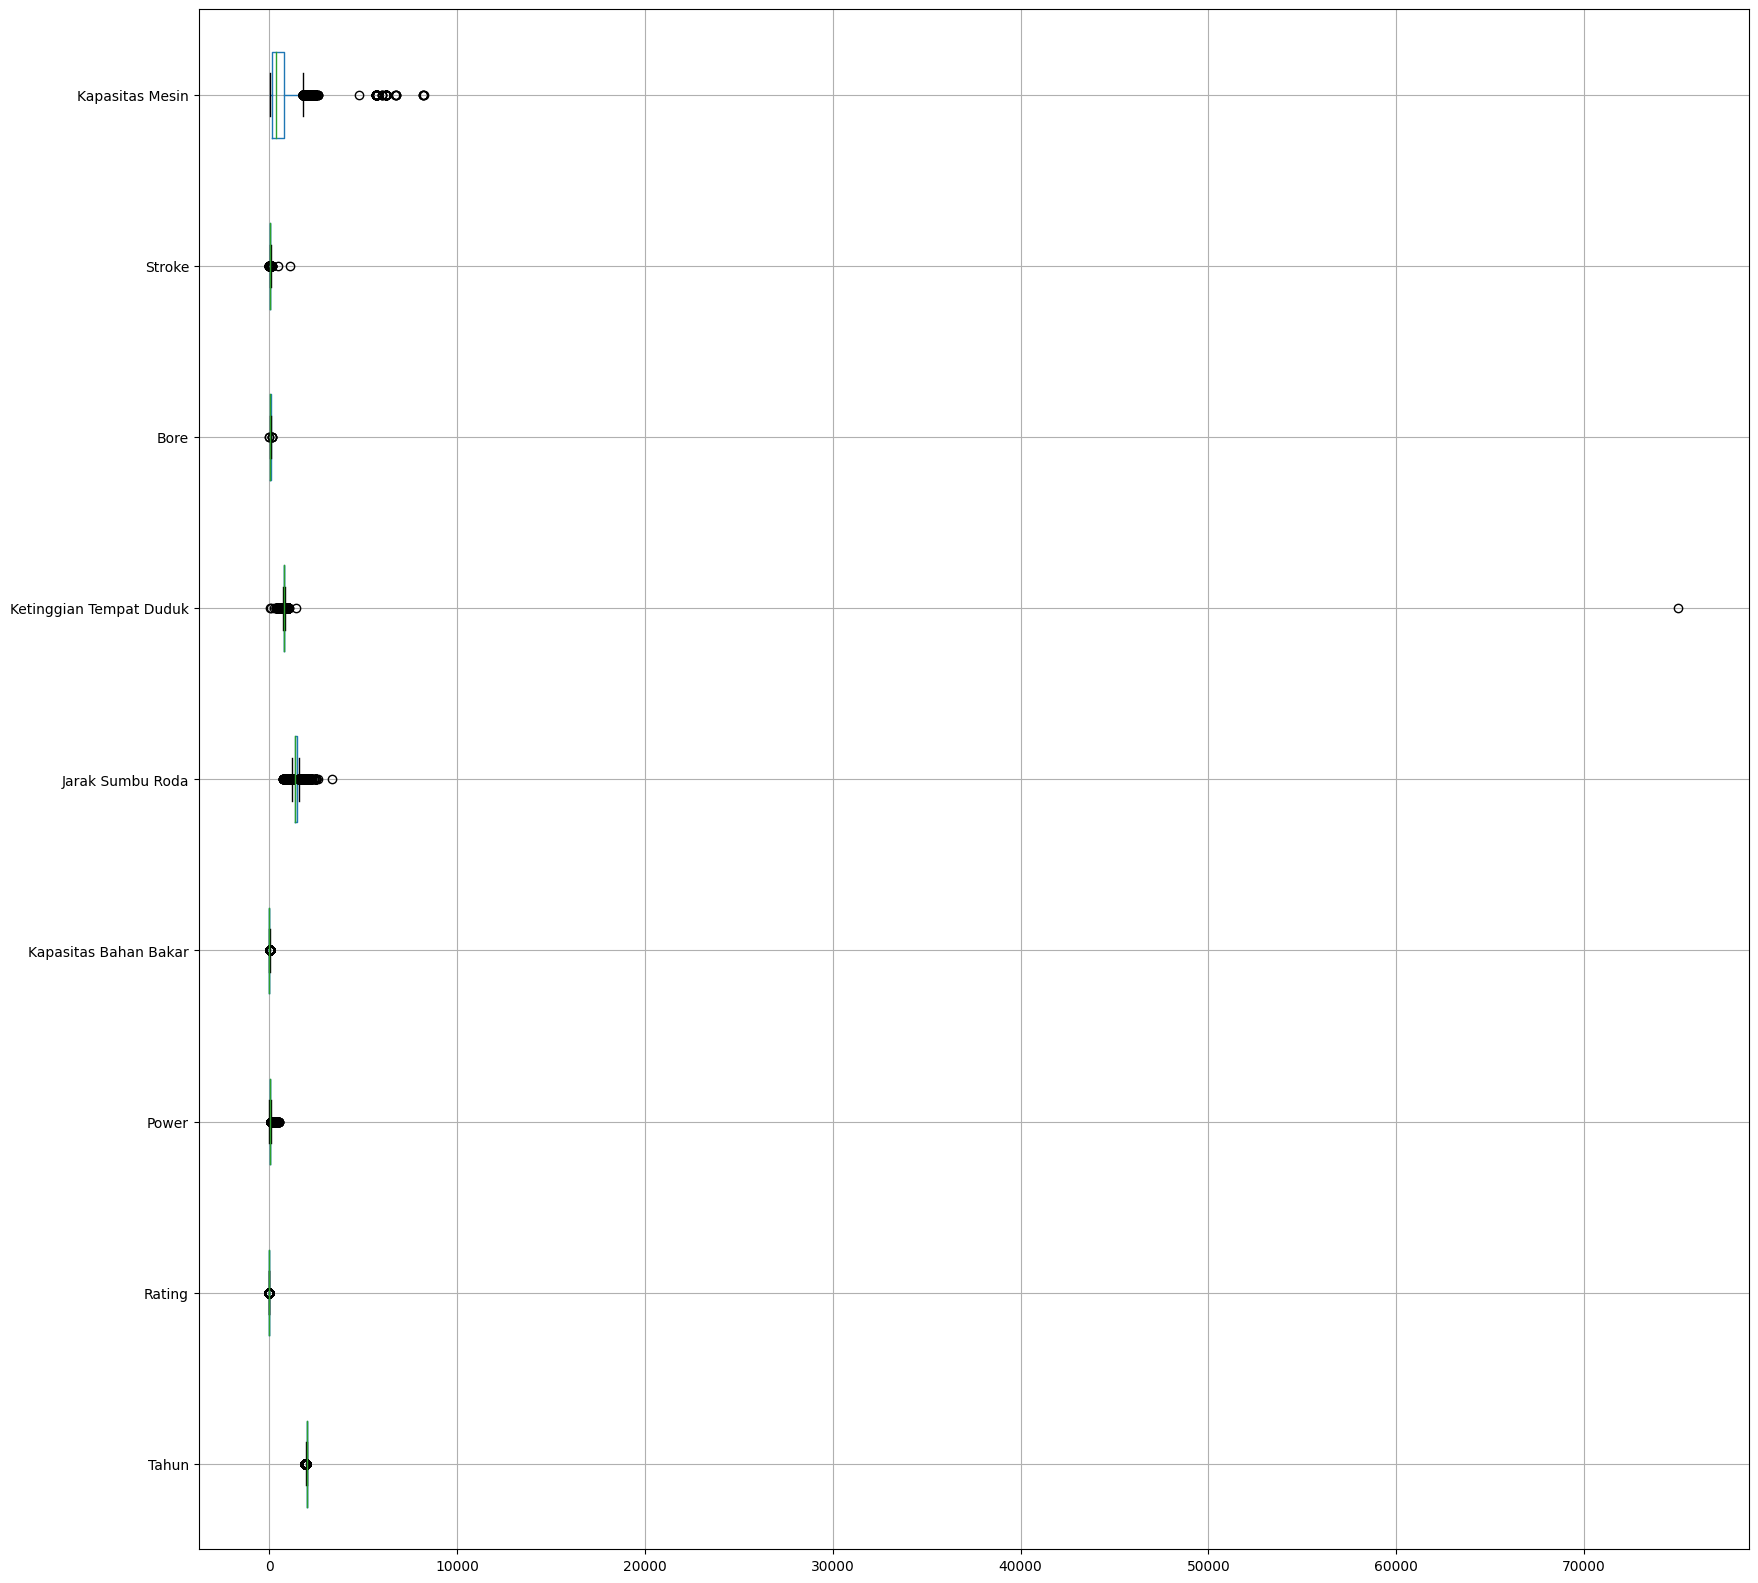

In [ ]:
df_SM.boxplot(vert=False,figsize=(20,20))

Hapus ketinggian tempat duduk terbesar karena data anomali

In [ ]:
indeks_terbesar_ketinggian = df_SM['Ketinggian Tempat Duduk'].nlargest(1).index
df_SM = df_SM.drop(indeks_terbesar_ketinggian)

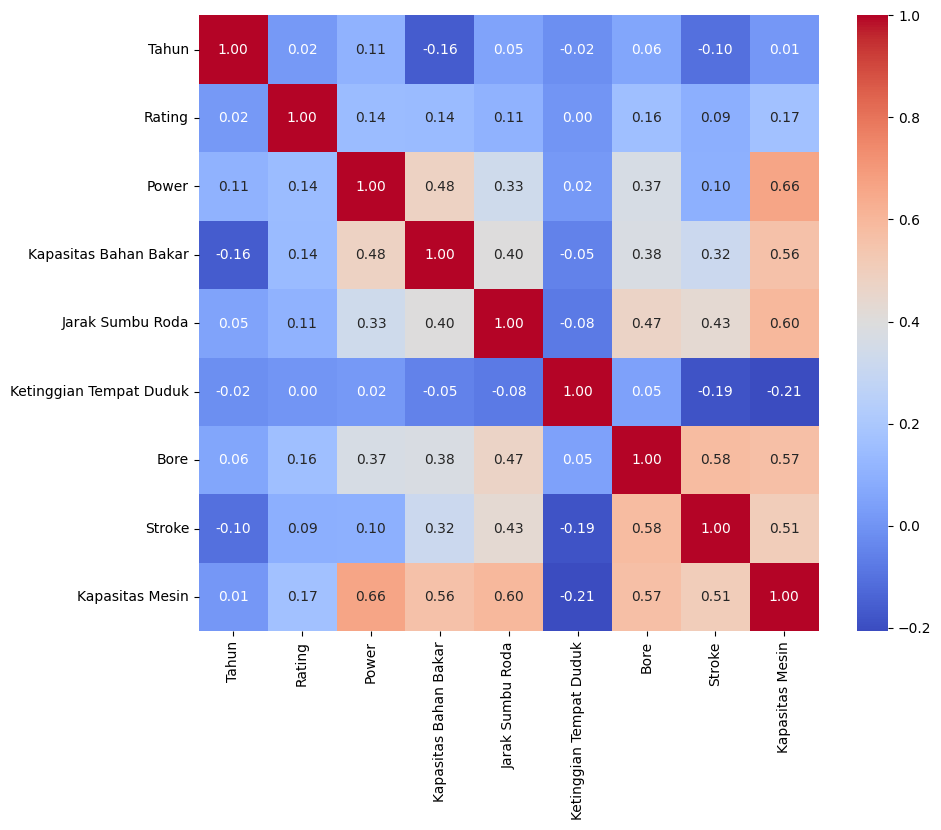

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_SM[continuous_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Show the plot
plt.show()

Hapus atribut yang korelasinya kecil

In [ ]:
df_SM = df_SM.drop(columns= ['Tahun'])

In [ ]:
df_SM = df_SM.drop(columns='Kategori')

In [ ]:
df_SM = df_SM.drop(columns=['Model', 'Warna', 'Suspensi Depan', 'Suspensi Belakang', 'Ban Depan', 'Ban Belakang'])

In [ ]:
continuous_cols = [ "Power", "Kapasitas Bahan Bakar", "Jarak Sumbu Roda", "Bore", "Stroke", "Kapasitas Mesin", "Rating",'Ketinggian Tempat Duduk']
discrete_cols = [col for col in df_SM.columns if col not in continuous_cols]

SM_continuous = df_SM[continuous_cols]
SM_discrete = df_SM[discrete_cols]

In [ ]:
discrete_cols

['Jenis Mesin',
 'Jenis Bahan Bakar',
 'Jenis Sistem Pendingin',
 'Gearbox',
 'Jenis Transmisi',
 'Kompresi',
 'Rem Depan',
 'Rem Belakang',
 'Starter']

In [ ]:
df_SM['Rem Depan'] = df_SM['Rem Depan'].str.split('.').str[0]
df_SM['Rem Belakang'] = df_SM['Rem Belakang'].str.split('.').str[0]

In [ ]:
df_SM['Rem Belakang'].unique()

array(['Expanding brake (drum brake)', 'Single disc', 'Expanding brake',
       'Double disc', 'Sealed multidisc', '245',
       'DCBS (Dual Combined Break System), single disc', 'Drum',
       'Dual disc', '(Unspecified)', 'Brembo single caliper',
       'Single disc, combined breaking system', 'Single disc, ABS',
       'Expanding break'], dtype=object)

In [ ]:
df_SM['Jenis Bahan Bakar'] = df_SM['Jenis Bahan Bakar'].str.split('.').str[0]

In [ ]:
df_SM['Jenis Bahan Bakar'].unique()

array(['Carburettor', 'Injection', 'Turbo'], dtype=object)

In [ ]:
df_SM['Jenis Mesin'] = df_SM['Jenis Mesin'].str.split(',').str[0]

In [ ]:
df_SM['Jenis Mesin'].unique()

array(['Single cylinder', 'Twin', 'V2', 'In-line four',
       'Two cylinder boxer', 'In-line six', 'In-line three',
       'Six cylinder boxer', 'Electric', 'Gas turbine', 'V4', 'V8',
       'Diesel', 'Single disk Wankel', 'Four cylinder boxer',
       'Square four cylinder', 'V6', 'V3', 'Radial', 'Dual disk Wankel'],
      dtype=object)

In [ ]:
df_SM['Jenis Transmisi'].unique()

array(['Chain \xa0 (final drive)', 'Belt \xa0 (final drive)',
       'Shaft drive (cardan) \xa0 (final drive)'], dtype=object)

In [ ]:
df_SM['Kompresi'] = pd.to_numeric(df_SM['Kompresi'].str.split(':').str[0], errors='coerce')

In [ ]:
df_SM['Kompresi'].unique()

array([  9.5,   9. ,   9.2,   8.8,  13. ,  12.1,  16.7,  10.1,  11.8,
        11.6,  10.5,  11. ,   7. ,  11.5,   8.3,  11.3,  10.8,   9.6,
         9.8,  10.3,  10. ,   8.4,  13.5,  13.4,  12.2,  12.5,   8.6,
        10.4,  13.3,   6.8,   6.5,  10.2,   7.2,  12. ,  13.9,  10.6,
         6. ,   7.4,   9.3,   8.2,   8. ,  11.7,   8.9,   8.5,   8.7,
         6.2,   6.7,  10.7,  12.9,   9.4,  12.8,  11.2,  11.9,   6.6,
         5.7,   9.9,   5.2,   7.9,   6.9,  12.6,  12.4,   9.1,  12.3,
         7.5,   9.7,  13.2,  20.5,  10.9,  11.4,  12.7,  13.8,  11.1,
        15.2,   8.1,   7.8,   7.1,  14.5,   6.3,   3.8,   7.3,   6.1,
        14.3,  14. ,   5.5,   6.4,  13.6,  16.2,   5.9,   5. ,  14.7,
        15.5,   5.8,  14.1,   7.7,  17.2,  15. ,  13.1,   7.6,  14.6,
         5.1,   4.7,  16.5,  15.9,  18. ,   4.9,  16. ,   5.6,  14.2,
       116. ,   4.5])

# Encoding

In [ ]:
continuous_cols = [ "Power", "Kapasitas Bahan Bakar", "Jarak Sumbu Roda", "Bore", "Stroke", "Kapasitas Mesin", "Rating"]
discrete_cols = [col for col in df_SM.columns if col not in continuous_cols]

SM_continuous = df_SM[continuous_cols]
SM_discrete = df_SM[discrete_cols]

In [ ]:
#one hot encoding
# untuk testing kaggle
discrete_cols_hot = ['Jenis Sistem Pendingin','Starter', 'Jenis Transmisi', 'Jenis Mesin', 'Rem Depan', 'Rem Belakang', 'Jenis Bahan Bakar', 'Gearbox']
discrete_cols_label = []
df_copy1 = df_SM.copy()

label_encoder = LabelEncoder()
hot_encoder = OneHotEncoder(sparse_output=False)

for x in discrete_cols_hot:
  df_copy1 = pd.get_dummies(df_copy1, columns=[x, ])

df_SM = df_copy1

In [ ]:
df_SM['Kompresi']

0         9.5
1         9.5
2         9.0
3         9.5
4         9.5
         ... 
29961     9.5
29962     9.0
29963     9.5
29964    12.0
29965    11.2
Name: Kompresi, Length: 29965, dtype: float64

# Outlier

In [ ]:
# mengecek nilai outlier
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers
check_outlier(df_SM[continuous_cols])

Outlier pada tiap atribut:
Power                    3339
Kapasitas Bahan Bakar     213
Jarak Sumbu Roda         4169
Bore                        6
Stroke                   2611
Kapasitas Mesin           625
Rating                   9659
dtype: int64


,Power,Kapasitas Bahan Bakar,Jarak Sumbu Roda,Bore,Stroke,Kapasitas Mesin,Rating
0,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False
4,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...
29961,False,False,False,False,False,False,False
29962,False,False,False,False,False,False,False
29963,False,False,True,False,False,False,False
29964,False,False,False,False,False,False,False


Memutuskan untuk tidak menghilangkan outlier karena tidak meningkatkan performa

# Feature Selection

In [ ]:
# untuk regresi
X_regresi = df_SM.drop(["Kapasitas Mesin"],axis=1)
y_regresi = df_SM['Kapasitas Mesin']

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k=20)
X_selected = selector.fit_transform(X_regresi, y_regresi)

In [ ]:
input_features = selector.feature_names_in_
selector.get_feature_names_out(input_features=input_features)

array(['Power', 'Kapasitas Bahan Bakar', 'Jarak Sumbu Roda',
       'Ketinggian Tempat Duduk', 'Bore', 'Stroke', 'Starter_Electric',
       'Starter_Electric & kick',
       'Jenis Transmisi_Chain \xa0 (final drive)',
       'Jenis Transmisi_Shaft drive (cardan) \xa0 (final drive)',
       'Jenis Mesin_Single cylinder', 'Jenis Mesin_V2', 'Jenis Mesin_V8',
       'Rem Depan_Double disc', 'Rem Depan_Single disc',
       'Rem Belakang_Expanding brake (drum brake)',
       'Rem Belakang_Single disc', 'Jenis Bahan Bakar_Carburettor',
       'Jenis Bahan Bakar_Injection', 'Gearbox_Automatic'], dtype=object)

# PCA Analysis

In [ ]:
from sklearn.decomposition import PCA
# Lakukan penskalaan data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_regresi)
# Lakukan analisis PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variants = pca.explained_variance_ratio_
explained_variants

array([8.14931969e-02, 4.07371934e-02, 3.59452219e-02, 2.83537668e-02,
       2.46683624e-02, 2.42468377e-02, 2.41722246e-02, 2.41165173e-02,
       2.41011038e-02, 2.31380818e-02, 2.18823283e-02, 2.04951347e-02,
       1.86337537e-02, 1.80046985e-02, 1.76427684e-02, 1.71109177e-02,
       1.61759931e-02, 1.50579280e-02, 1.48594860e-02, 1.41743972e-02,
       1.35171221e-02, 1.32975326e-02, 1.27359204e-02, 1.27012511e-02,
       1.25252981e-02, 1.24131205e-02, 1.23206673e-02, 1.21557125e-02,
       1.21417748e-02, 1.20944128e-02, 1.20780400e-02, 1.20743715e-02,
       1.20645436e-02, 1.20581812e-02, 1.20526480e-02, 1.20507851e-02,
       1.20473450e-02, 1.20465100e-02, 1.20440318e-02, 1.20266620e-02,
       1.20217987e-02, 1.19620805e-02, 1.18935796e-02, 1.17722637e-02,
       1.17228660e-02, 1.15123281e-02, 1.12654378e-02, 1.10533136e-02,
       1.09944404e-02, 1.06052831e-02, 1.05327058e-02, 1.00359676e-02,
       9.13095515e-03, 8.97338609e-03, 8.66033301e-03, 8.32397852e-03,
      

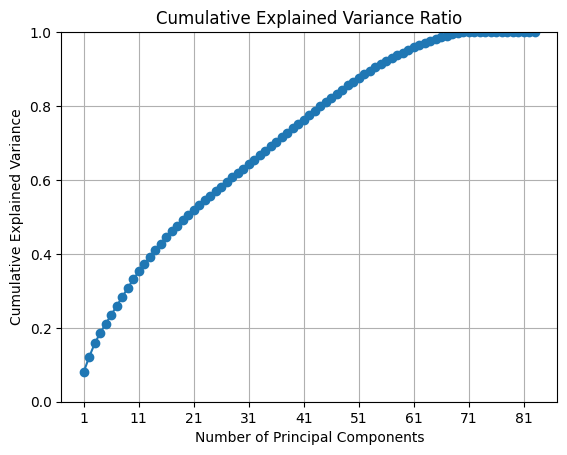

In [ ]:
# Hitung cumulative explained variance ratio
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Buat plot cumulative explained variance ratio
plt.plot(range(1, 84), explained_variance_ratio_cumulative, marker='o', linestyle='-')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.title('Cumulative Explained Variance Ratio')
plt.xticks(range(1, 84, 10))
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [ ]:
# Lakukan analisis PCA
pca_c = PCA(n_components=65)
X_selected_pca = pca_c.fit_transform(X_scaled)

# Splitting Data

Memutuskan memakai data murni

In [ ]:
# splitting training dan test untuk regresi
X_train_regresi, X_test_regresi, y_train_regresi, y_test_regresi = train_test_split(X_regresi, y_regresi, test_size=0.2, random_state = 42)

In [ ]:
np.set_printoptions()

# Melakukan Standarisasi

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_regresi)
X_test_scaled = scaler.transform(X_test_regresi)

# KNN

In [ ]:
# Mengatur jumlah pelatihan pada fold fold yang ada.
kfold = KFold(n_splits=4, shuffle=True, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

model = KNeighborsRegressor()

# Define the hyperparameter grid
tuned_params = [{'n_neighbors': [1, 2, 3, 4], 'metric': ['manhattan', 'euclidean']}]

print("Tuning hyper-parameters for KNN Regression")
print()

# Assuming you have defined 'kfold'
clfKNN = GridSearchCV(
    model,
    tuned_params,
    scoring='r2',
    cv=kfold,
    verbose=2
)

clfKNN.fit(X_train_scaled, y_train_regresi)

print()
print("Best parameters set found on development set:")
print(clfKNN.best_params_)
print()
print("Detailed regression report:")
y_true, y_pred = y_test_regresi, clfKNN.predict(X_test_scaled)

# Evaluate the model using mean squared error
regression_metrics(y_pred, y_true)

Tuning hyper-parameters for KNN Regression

Fitting 4 folds for each of 4 candidates, totalling 16 fits
[CV] END ....................metric=manhattan, n_neighbors=1; total time=  11.4s
[CV] END ....................metric=manhattan, n_neighbors=1; total time=  11.8s
[CV] END ....................metric=manhattan, n_neighbors=1; total time=  12.3s
[CV] END ....................metric=manhattan, n_neighbors=1; total time=  11.7s
[CV] END ....................metric=manhattan, n_neighbors=2; total time=  11.5s
[CV] END ....................metric=manhattan, n_neighbors=2; total time=  12.3s
[CV] END ....................metric=manhattan, n_neighbors=2; total time=  11.3s
[CV] END ....................metric=manhattan, n_neighbors=2; total time=  20.1s
[CV] END ....................metric=manhattan, n_neighbors=3; total time=  11.1s
[CV] END ....................metric=manhattan, n_neighbors=3; total time=  11.1s
[CV] END ....................metric=manhattan, n_neighbors=3; total time=  11.8s
[CV] 

In [ ]:
# melakukan cross validation performa kinerja data latih
kfold = KFold(n_splits=4, shuffle=True, random_state=42)

scores = cross_val_score(clfKNN, X_train_scaled, y_train_regresi, scoring='r2', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Fitting 4 folds for each of 4 candidates, totalling 16 fits
[CV] END ....................metric=manhattan, n_neighbors=1; total time=   7.3s
[CV] END ....................metric=manhattan, n_neighbors=1; total time=   7.6s
[CV] END ....................metric=manhattan, n_neighbors=1; total time=  13.2s
[CV] END ....................metric=manhattan, n_neighbors=1; total time=  11.4s
[CV] END ....................metric=manhattan, n_neighbors=2; total time=   8.0s
[CV] END ....................metric=manhattan, n_neighbors=2; total time=   5.9s
[CV] END ....................metric=manhattan, n_neighbors=2; total time=   6.8s
[CV] END ....................metric=manhattan, n_neighbors=2; total time=   6.2s
[CV] END ....................metric=manhattan, n_neighbors=3; total time=   6.3s
[CV] END ....................metric=manhattan, n_neighbors=3; total time=   7.7s
[CV] END ....................metric=manhattan, n_neighbors=3; total time=   9.4s
[CV] END ....................metric=manhattan, n_

# Random Forest Regressor

In [ ]:
# Melakukan training pada model random forest
rf_md = RandomForestRegressor()
rf_md.fit(X_train_regresi, y_train_regresi)

# Memprediksi data testing
predicted = rf_md.predict(X_test_regresi)

# Menampilkan metrics
regression_metrics(predicted, y_test_regresi)

MAE: 17.252697869628275
MSE: 4596.80516857601
RMSE: 67.79974313060492
R_squared: 0.9845599401941668


In [ ]:
# melakukan cross validation performa kinerja data latih
kfold = KFold(n_splits=4, shuffle=True, random_state=42)

scores = cross_val_score(rf_md, X_train_regresi, y_train_regresi, scoring='r2', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.9794019067195718


Setelah dicari lebih baik memakai data yang non standarisasi

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train_scaled, y_train_regresi)

LinearRegression()

In [ ]:
# Melihat nilai koefisien dan intersep persamaan linear regression pada trained model
print("Koefisien persamaan linear: \n", linear.coef_)
print("Intersep persamaan linear: \n", linear.intercept_)

Koefisien persamaan linear: 
 [ 2.80120046e+00  6.42027039e+01  4.35934287e+01  2.94549383e+01
 -1.11699314e+01  1.53504672e+02  6.73887605e+01 -6.40796701e+00
  2.33380473e+13  2.33380473e+13  2.33380473e+13 -6.94978746e+13
 -6.94978746e+13 -6.94978746e+13  1.73407208e+13  1.73407208e+13
  1.73407208e+13 -3.05339337e+12 -3.05339337e+12 -3.05339337e+12
 -3.05339337e+12 -3.05339337e+12 -3.05339337e+12 -3.05339337e+12
 -3.05339337e+12 -3.05339337e+12 -3.05339337e+12 -3.05339337e+12
 -3.05339337e+12 -3.05339337e+12 -3.05339337e+12 -3.05339337e+12
 -3.05339337e+12 -3.05339337e+12 -3.05339337e+12 -3.05339337e+12
 -3.05339337e+12  3.32507832e+13  3.32553877e+13  3.31804010e+13
  4.59820894e+13  4.59820894e+13  3.30946978e+13  3.31041604e+13
  4.59820894e+13  4.59820894e+13  4.59820894e+13  4.59820894e+13
  4.59820894e+13  4.59820894e+13  3.30263344e+13  3.47821265e+08
  3.30217299e+13  3.30967166e+13  2.02950283e+13  2.02950283e+13
  2.02950283e+13  2.02950283e+13  2.02950283e+13 -2.66985988

In [ ]:
# pengecekan dengan data baru
y_predict = linear.predict(X_test_scaled)
print("Shape of y_test:", y_test_regresi.shape)
print("Shape of y_predict:", y_predict.shape)

from sklearn import metrics
# Nilai R-squared
print("R-squared:", metrics.r2_score(y_test_regresi, y_predict))
print()
regression_metrics(y_predict, y_test_regresi)

Shape of y_test: (5993,)
Shape of y_predict: (5993,)
R-squared: -4.6169007102574746e+17

MAE: 6772853682.084454
MSE: 1.3745408576523676e+23
RMSE: 370748008444.05994
R_squared: -4.6169007102574746e+17


In [ ]:
# melakukan cross validation performa kinerja data latih
kfold = KFold(n_splits=4, shuffle=True, random_state=42)

scores = cross_val_score(linear, X_train_scaled, y_train_regresi, scoring='r2', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: -4.3134851849090904e+16


# Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
list_alpha = [1, 2, 3, 4, 5, 6]

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
result_mae = []
result_mse = []
result_rmse = []
result_r2 = []

for x in range(len(list_alpha)):
  lasso = Lasso(alpha=list_alpha[x]) # Mengatur hyperparameter
  lasso.fit(X_train_scaled, y_train_regresi)

  # Melakukan prediksi pada data pengujian
  y_pred = lasso.predict(X_test_scaled)

  # Menghitung metrik-metrik evaluasi
  mae = mean_absolute_error(y_test_regresi, y_pred)
  mse = mean_squared_error(y_test_regresi, y_pred)
  rmse = np.sqrt(mse)
  r_squared = r2_score(y_test_regresi, y_pred)

  result_mae.append(mae)
  result_mse.append(mse)
  result_rmse.append(rmse)
  result_r2.append(r_squared)

In [ ]:
print(f"Hasil evaluasi model lasso regression untuk MAE adalah {result_mae}")
print(f"Hasil evaluasi model lasso regression untuk MSE adalah {result_mse}")
print(f"Hasil evaluasi model lasso regression untuk RMSE adalah {result_rmse}")
print(f"Hasil evaluasi model lasso regression untuk R-Squared adalah {result_r2}")

Hasil evaluasi model lasso regression untuk MAE adalah [122.61990028294278, 128.14575903686142, 132.79989971623232, 138.3593734127679, 144.76739219601922, 150.90115411080677]
Hasil evaluasi model lasso regression untuk MSE adalah [37779.911371600196, 42008.36828371918, 46312.824024359485, 51773.48626113054, 58415.700080616014, 65642.0494382024]
Hasil evaluasi model lasso regression untuk RMSE adalah [194.37055170884346, 204.95943082405157, 215.20414499809127, 227.53787873919046, 241.69340098690327, 256.2070440838862]
Hasil evaluasi model lasso regression untuk R-Squared adalah [0.8731022809006096, 0.8588994541078154, 0.8444413573145514, 0.8260997160173376, 0.8037893994267918, 0.7795170489208987]


In [ ]:
# mencari nilai indeks dengan r2 terbaik
index_r2_terbaik = np.argmax(result_r2)

lasso = Lasso(alpha=list_alpha[index_r2_terbaik]) # Mengatur hyperparameter dengan r2 terbaik
lasso.fit(X_train_scaled, y_train_regresi)

# Melakukan prediksi pada data pengujian
y_pred = lasso.predict(X_test_scaled)

# Menghitung metrik-metrik evaluasi
mae = mean_absolute_error(y_test_regresi, y_pred)
mse = mean_squared_error(y_test_regresi, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test_regresi, y_pred)

# hasil evaluasi model dengan alpha terbaik
print(f"Hasil evaluasi model lasso regression untuk MAE adalah {mae}")
print(f"Hasil evaluasi model lasso regression untuk MSE adalah {mse}")
print(f"Hasil evaluasi model lasso regression untuk RMSE adalah {rmse}")
print(f"Hasil evaluasi model lasso regression untuk R-Squared adalah {r_squared}")

Hasil evaluasi model lasso regression untuk MAE adalah 122.61990028294278
Hasil evaluasi model lasso regression untuk MSE adalah 37779.911371600196
Hasil evaluasi model lasso regression untuk RMSE adalah 194.37055170884346
Hasil evaluasi model lasso regression untuk R-Squared adalah 0.8731022809006096


In [ ]:
# tampilan koefisien dan intersep persamaan regresi lasso terbaik
print("Koefisien persamaan regresi lasso: \n", lasso.coef_)
print("Intersep persamaan regresi lasso: \n", lasso.intercept_)

Koefisien persamaan regresi lasso: 
 [ 3.34290138e+00  7.62976016e+01  4.33310652e+01  3.58363686e+01
 -1.33728182e+01  1.37170550e+02  6.88873237e+01 -6.42421055e+00
  1.46175449e+01 -1.84610695e+01 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.42970415e+01 -5.90801240e+01
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.62965030e+02
  0.00000000e+00 -0.00000000e+00  7.71947921e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -3.63150149e+02 -0.00000000e+00
  3.49286439e+02  0.00000000e+00 -1.93422949e+02 -7.46056231e+01
  2.18276446e+01 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.54003478e+03  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  9.31646583e+00 -2.50250540e+01  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -1.41224201e+01 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -1.83798379e+01 -0.00000000e+00  0.0

In [ ]:
# melakukan cross validation performa kinerja data latih
kfold = KFold(n_splits=4, shuffle=True, random_state=42)

scores = cross_val_score(lasso, X_train_scaled, y_train_regresi, scoring='r2', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.8592009594630616


# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
list_alpha = [1, 2, 3, 4, 5, 6]

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
result_mae = []
result_mse = []
result_rmse = []
result_r2 = []

for x in range(len(list_alpha)):
  ridge = Ridge(alpha=list_alpha[x]) # Mengatur hyperparameter
  ridge.fit(X_train_scaled, y_train_regresi)

  # Melakukan prediksi pada data pengujian
  y_pred = ridge.predict(X_test_scaled)

  # Menghitung metrik-metrik evaluasi
  mae = mean_absolute_error(y_test_regresi, y_pred)
  mse = mean_squared_error(y_test_regresi, y_pred)
  rmse = np.sqrt(mse)
  r_squared = r2_score(y_test_regresi, y_pred)

  result_mae.append(mae)
  result_mse.append(mse)
  result_rmse.append(rmse)
  result_r2.append(r_squared)

In [ ]:
print(f"Hasil evaluasi model Ridge regression untuk MAE adalah {result_mae}")
print(f"Hasil evaluasi model Ridge regression untuk MSE adalah {result_mse}")
print(f"Hasil evaluasi model Ridge regression untuk RMSE adalah {result_rmse}")
print(f"Hasil evaluasi model Ridge regression untuk R-Squared adalah {result_r2}")

Hasil evaluasi model Ridge regression untuk MAE adalah [119.22054174078359, 119.52290310903884, 119.83777683270674, 120.14901529589297, 120.46176497055318, 120.76808954158587]
Hasil evaluasi model Ridge regression untuk MSE adalah [34880.05700834518, 35060.044644769914, 35261.92673028657, 35478.090436209815, 35704.525965524255, 35938.63002698265]
Hasil evaluasi model Ridge regression untuk RMSE adalah [186.76203310187321, 187.24327663435585, 187.7815931615412, 188.35628589513496, 188.95641287218663, 189.57486654876658]
Hasil evaluasi model Ridge regression untuk R-Squared adalah [0.8828425076787512, 0.8822379530437829, 0.8815598578537993, 0.8808337925921864, 0.8800732256361012, 0.8792869010960891]


In [ ]:
# mencari nilai indeks dengan r2 terbaik
index_r2_terbaik = np.argmax(result_r2)

ridge = Ridge(alpha=list_alpha[index_r2_terbaik]) # Mengatur hyperparameter dengan r2 terbaik
ridge.fit(X_train_scaled, y_train_regresi)

# Melakukan prediksi pada data pengujian
y_pred = ridge.predict(X_test_scaled)

# Menghitung metrik-metrik evaluasi
mae = mean_absolute_error(y_test_regresi, y_pred)
mse = mean_squared_error(y_test_regresi, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test_regresi, y_pred)

# hasil evaluasi model dengan alpha terbaik
print(f"Hasil evaluasi model Ridge regression untuk MAE adalah {mae}")
print(f"Hasil evaluasi model Ridge regression untuk MSE adalah {mse}")
print(f"Hasil evaluasi model Ridge regression untuk RMSE adalah {rmse}")
print(f"Hasil evaluasi model Ridge regression untuk R-Squared adalah {r_squared}")

Hasil evaluasi model Ridge regression untuk MAE adalah 119.22054174078359
Hasil evaluasi model Ridge regression untuk MSE adalah 34880.05700834518
Hasil evaluasi model Ridge regression untuk RMSE adalah 186.76203310187321
Hasil evaluasi model Ridge regression untuk R-Squared adalah 0.8828425076787512


In [ ]:
# tampilan koefisien dan intersep persamaan regresi ridge terbaik
print("Koefisien persamaan regresi ridge: \n", ridge.coef_)
print("Intersep persamaan regresi ridge: \n", ridge.intercept_)

Koefisien persamaan regresi ridge: 
 [ 2.77874437e+00  6.64587006e+01  4.36924706e+01  3.01968181e+01
 -1.13306341e+01  1.51866535e+02  6.73749829e+01 -6.50551064e+00
  2.27915874e+01 -2.87500288e+01  5.95844142e+00 -4.91190538e+00
  3.10876115e+00  1.80314423e+00  6.57621523e+01 -5.69515119e+01
 -8.81064045e+00 -2.90820801e+02 -2.01404565e+02 -6.62243914e+02
  1.07573074e+02 -1.43815836e+03 -8.44832400e+01  1.56209289e+02
 -1.50244103e+02 -4.73560171e+02 -5.21736482e+02 -2.90440832e+02
  5.67069711e+02  3.33054435e+00 -3.40526089e+02 -2.53799684e+02
 -1.02478623e+02 -1.92035562e+02 -1.93290262e+01  2.68870420e+02
  3.91820841e+03  6.95565231e+00 -1.74816881e+01  2.42773157e+01
  9.99687231e+00 -5.91136747e+01  4.32713563e+01 -3.94038006e+01
  3.56205270e+01  2.08249512e+01 -1.07154958e+02  1.63689733e+02
 -3.14728927e+00 -7.83349970e+01  6.95565231e+00  0.00000000e+00
 -1.74816881e+01  2.42773157e+01  3.89573770e+01 -9.17238229e+00
 -1.90625516e+01 -7.06486650e+01 -4.17772462e+01  0.0

In [ ]:
# melakukan cross validation performa kinerja data latih
kfold = KFold(n_splits=4, shuffle=True, random_state=42)

scores = cross_val_score(ridge, X_train_scaled, y_train_regresi, scoring='r2', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.8695335043135313


# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor()

gb_regressor.fit(X_train_scaled, y_train_regresi.ravel())

predicted = gb_regressor.predict(X_test_scaled)

regression_metrics(predicted, y_test_regresi)

MAE: 70.9417473537998
MSE: 17667.144242810293
RMSE: 132.91781010387695
R_squared: 0.9406584021502538


In [ ]:
# melakukan cross validation performa kinerja data latih
kfold = KFold(n_splits=4, shuffle=True, random_state=42)

scores = cross_val_score(gb_regressor, X_train_scaled, y_train_regresi, scoring='r2', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.9371762795794725


# NN

In [ ]:
from sklearn.neural_network import MLPRegressor
# Create an MLP Regressor
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 200, 50), solver='adam', max_iter=400,
    random_state=42,
    activation='relu', alpha=1e-5,)

# Fit the model to the training data
mlp_regressor.fit(X_train_scaled, y_train_regresi)

# Make predictions on the testing data
y_pred = mlp_regressor.predict(X_test_scaled)

regression_metrics(y_pred, y_test_regresi)

MAE: 31.983823446001548
MSE: 7004.313002226017
RMSE: 83.69177380260271
R_squared: 0.9764734402074634


In [ ]:
# melakukan cross validation performa kinerja data latih
kfold = KFold(n_splits=4, shuffle=True, random_state=42)

scores = cross_val_score(mlp_regressor, X_train_scaled, y_train_regresi, scoring='r2', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.9704221035016994


# Best Model Regression

Berdasarkan hasil evaluasi, kita mendapatkan bahwa random forest model yang paling baik dengan data yang tidak distandarisasi. Oleh karena itu kita akan tuning random forest untuk mendapatkan hasil terbaik

In [ ]:
param_grid = {'criterion': ['squared_error', 'friedman_mse'],
              'n_estimators' : [300, 400],
              'bootstrap' : [True, False],
              }

#Grid search random forest regressor
rfr = RandomForestRegressor()
clf_random_regressor = GridSearchCV(estimator= rfr,
                   param_grid=param_grid, cv= 2, verbose=2)

clf_random_regressor.fit(X_train_regresi, y_train_regresi)


Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] END bootstrap=True, criterion=squared_error, n_estimators=300; total time=  30.5s
[CV] END bootstrap=True, criterion=squared_error, n_estimators=300; total time=  35.0s
[CV] END bootstrap=True, criterion=squared_error, n_estimators=400; total time=  35.2s
[CV] END bootstrap=True, criterion=squared_error, n_estimators=400; total time=  36.4s
[CV] END bootstrap=True, criterion=friedman_mse, n_estimators=300; total time=  27.3s
[CV] END bootstrap=True, criterion=friedman_mse, n_estimators=300; total time=  27.0s
[CV] END bootstrap=True, criterion=friedman_mse, n_estimators=400; total time=  36.0s
[CV] END bootstrap=True, criterion=friedman_mse, n_estimators=400; total time=  38.0s
[CV] END bootstrap=False, criterion=squared_error, n_estimators=300; total time=  39.0s
[CV] END bootstrap=False, criterion=squared_error, n_estimators=300; total time=  40.4s
[CV] END bootstrap=False, criterion=squared_error, n_estimators=400; tot

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'friedman_mse'],
                         'n_estimators': [300, 400]},
             verbose=2)

In [ ]:
#CLF Random forest regressor
clf_random_regressor.best_params_

{'bootstrap': True, 'criterion': 'squared_error', 'n_estimators': 400}

In [ ]:
best_random_regressor = RandomForestRegressor(**clf_random_regressor.best_params_)
best_random_regressor.fit(X_train_regresi, y_train_regresi)

RandomForestRegressor(n_estimators=400)

In [ ]:
predicted_random_regressor = best_random_regressor.predict(X_test_regresi)
regression_metrics(predicted_random_regressor, y_test_regresi)

MAE: 17.10243860120775
MSE: 4462.69263632782
RMSE: 66.80338791055301
R_squared: 0.9850104064294511


In [ ]:
# melakukan cross validation performa kinerja data latih
kfold = KFold(n_splits=4, shuffle=True, random_state=42)

scores = cross_val_score(best_random_regressor, X_train_regresi, y_train_regresi, scoring='r2', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.9797663822214062


# Submisi Kaggle

In [ ]:
df_test = pd.read_csv('SM_test.csv')
df_test.drop(df_test.columns[0], axis=1, inplace=True)

df_kaggle = df_test[['ID']].copy()
df_test.drop(['ID',], axis=1, inplace=True)
df_test

,Model,Tahun,Rating,Power,Kapasitas Bahan Bakar,Jarak Sumbu Roda,Ketinggian Tempat Duduk,Bore,Stroke,Jenis Mesin,...,Jenis Transmisi,Suspensi Depan,Suspensi Belakang,Kompresi,Ban Depan,Ban Belakang,Rem Depan,Rem Belakang,Warna,Starter
0,Yamaha V Star 1300 Tourer,2018,3.0,27.0,18.55,1689,691,100.0,83.0,"V2, four-stroke",...,Belt (final drive),41mm Telescopic fork,Bottom-link-type monocross system with a gas c...,9.5:1,130/90-M16,170/70-B16,Double disc. Hydraulic.,Single disc. Hydraulic.,Galaxy Blue,Electric
1,Sym Orbit III 50,2022,3.5,3.0,6.20,1290,800,54.0,66.0,"Single cylinder, four-stroke",...,Belt (final drive),Telescopic Fork,Single Shock,9.5:1,110/70-12,120/70-12,Single disc,Expanding brake (drum brake),"Green, blue, white, mat black",Electric
2,Kawasaki Ninja Z H2,2022,3.5,197.1,19.00,1455,831,76.0,55.0,"In-line four, four-stroke",...,Chain (final drive),Showa SFF-BP Fork with Adjustable Compression ...,"Uni-Trak®, Showa Gas-Charged Shock with Adjust...",11.2:1,120/70-ZR17,190/55-ZR17,Double disc. Brembo. ABS.,Single disc. ABS.,Metallic Graphite Gray/Metallic Diablo Black,Electric
3,Honda FourTrax Rancher,2014,3.5,27.0,14.76,1267,856,86.5,71.5,"Single cylinder, four-stroke",...,Shaft drive (cardan) (final drive),Independent double-wishbone,Swingarm with single shock,9.9:1,24/8-12,24/10-11,Double disc. Hydraulic.,Expanding brake (drum brake),"Red, Olive",Electric
4,Daelim Steezer,2016,3.5,12.4,9.60,1382,740,54.0,66.0,"Single cylinder, four-stroke",...,Belt (final drive),Telescopic,Swing Arm,9.5:1,120/70-14,130/60-14,Single disc,Single disc,Black,Electric
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7487,Ural Patrol,2006,3.6,40.0,19.00,1400,785,78.0,78.0,"Twin, four-stroke",...,Shaft drive (cardan) (final drive),Leading link forks,Hydraulic spring shock absorbers,8.6:1,120/70-ZR17,180/55-ZR17,Single disc,Expanding brake (drum brake). Rear and sidecar...,"Woodland Green, Deep Blue",Electric & kick
7488,PGO G-Max 150 EFI,2016,3.6,16.1,7.00,1365,800,54.0,66.0,"Single cylinder, four-stroke",...,Belt (final drive),Telescopic fork,Monoshock,9.5:1,120/60-13,130/60-13,Single disc. 4-piston,Single disc. 2-piston,"Yellow, red, white",Electric
7489,Honda CBR650F,2017,3.4,85.8,17.30,1450,810,67.0,46.0,"In-line four, four-stroke",...,Chain (final drive),41mm Fork,Single shock with spring-preload adjustability,11.4:1,120/70-ZR17,180/55-ZR17,Double disc. Two-piston calipers.,Single disc. Single-piston caliper.,"Matte Black Metallic/Candy Red, Black",Electric
7490,Honda XRV 750 Africa Twin,2003,3.9,60.0,23.00,1400,860,81.0,72.0,"V2, four-stroke",...,Chain (final drive),Telescopic fork,Monoshock,9.5:1,90/90-21,140/80-17,Double disc,Single disc,Black,Electric


In [ ]:
df_test['Rem Depan'] = df_test['Rem Depan'].str.split('.').str[0]
df_test['Rem Belakang'] = df_test['Rem Belakang'].str.split('.').str[0]
df_test['Kompresi'] = pd.to_numeric(df_test['Kompresi'].str.split(':').str[0], errors='coerce')

In [ ]:
df_test['Jenis Bahan Bakar'] = df_test['Jenis Bahan Bakar'].str.split('.').str[0]
df_test['Jenis Mesin'] = df_test['Jenis Mesin'].str.split(',').str[0]

In [ ]:
# untuk testing kaggle
discrete_cols_hot = ['Jenis Sistem Pendingin','Starter', 'Jenis Transmisi', 'Jenis Mesin', 'Rem Depan', 'Rem Belakang','Jenis Bahan Bakar', 'Gearbox']
discrete_cols_label = []
df_copy1_test = df_test.copy()

label_encoder = LabelEncoder()
hot_encoder = OneHotEncoder(sparse_output=False)

# for x in discrete_cols_label:
#   df_copy1_test[x] = label_encoder.fit_transform(df_copy1_test[x])

for x in discrete_cols_hot:
  df_copy1_test = pd.get_dummies(df_copy1_test, columns=[x, ])

df_test = df_copy1_test

In [ ]:
df_test

,Model,Tahun,Rating,Power,Kapasitas Bahan Bakar,Jarak Sumbu Roda,Ketinggian Tempat Duduk,Bore,Stroke,Suspensi Depan,...,Gearbox_2-speed automatic,Gearbox_3-speed,Gearbox_4-speed,Gearbox_4-speed with reverse,Gearbox_5-speed,Gearbox_5-speed with reverse,Gearbox_6-speed,Gearbox_7-speed,Gearbox_8-speed,Gearbox_Automatic
0,Yamaha V Star 1300 Tourer,2018,3.0,27.0,18.55,1689,691,100.0,83.0,41mm Telescopic fork,...,0,0,0,0,1,0,0,0,0,0
1,Sym Orbit III 50,2022,3.5,3.0,6.20,1290,800,54.0,66.0,Telescopic Fork,...,0,0,0,0,0,0,0,0,0,1
2,Kawasaki Ninja Z H2,2022,3.5,197.1,19.00,1455,831,76.0,55.0,Showa SFF-BP Fork with Adjustable Compression ...,...,0,0,0,0,0,0,1,0,0,0
3,Honda FourTrax Rancher,2014,3.5,27.0,14.76,1267,856,86.5,71.5,Independent double-wishbone,...,0,0,0,0,1,0,0,0,0,0
4,Daelim Steezer,2016,3.5,12.4,9.60,1382,740,54.0,66.0,Telescopic,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7487,Ural Patrol,2006,3.6,40.0,19.00,1400,785,78.0,78.0,Leading link forks,...,0,0,1,0,0,0,0,0,0,0
7488,PGO G-Max 150 EFI,2016,3.6,16.1,7.00,1365,800,54.0,66.0,Telescopic fork,...,0,0,0,0,0,0,0,0,0,1
7489,Honda CBR650F,2017,3.4,85.8,17.30,1450,810,67.0,46.0,41mm Fork,...,0,0,0,0,0,0,1,0,0,0
7490,Honda XRV 750 Africa Twin,2003,3.9,60.0,23.00,1400,860,81.0,72.0,Telescopic fork,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
train_columns = set(df_SM.columns)
test_columns = set(df_test.columns)

train_columns_only = train_columns - test_columns
test_columns_only = test_columns - train_columns

for column in train_columns_only:
    df_test[column] = 0

cols_testing = df_test[df_SM.columns]
testing_selected = cols_testing.drop(columns=['Kapasitas Mesin'])
testing_selected

,Rating,Power,Kapasitas Bahan Bakar,Jarak Sumbu Roda,Ketinggian Tempat Duduk,Bore,Stroke,Kompresi,Jenis Sistem Pendingin_Air,Jenis Sistem Pendingin_Liquid,...,Gearbox_3-speed automatic,Gearbox_4-speed,Gearbox_4-speed with reverse,Gearbox_5-speed,Gearbox_5-speed with reverse,Gearbox_6-speed,Gearbox_6-speed with reverse,Gearbox_7-speed,Gearbox_8-speed,Gearbox_Automatic
0,3.0,27.0,18.55,1689,691,100.0,83.0,9.5,0,1,...,0,0,0,1,0,0,0,0,0,0
1,3.5,3.0,6.20,1290,800,54.0,66.0,9.5,1,0,...,0,0,0,0,0,0,0,0,0,1
2,3.5,197.1,19.00,1455,831,76.0,55.0,11.2,0,1,...,0,0,0,0,0,1,0,0,0,0
3,3.5,27.0,14.76,1267,856,86.5,71.5,9.9,0,1,...,0,0,0,1,0,0,0,0,0,0
4,3.5,12.4,9.60,1382,740,54.0,66.0,9.5,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7487,3.6,40.0,19.00,1400,785,78.0,78.0,8.6,1,0,...,0,1,0,0,0,0,0,0,0,0
7488,3.6,16.1,7.00,1365,800,54.0,66.0,9.5,0,1,...,0,0,0,0,0,0,0,0,0,1
7489,3.4,85.8,17.30,1450,810,67.0,46.0,11.4,0,1,...,0,0,0,0,0,1,0,0,0,0
7490,3.9,60.0,23.00,1400,860,81.0,72.0,9.5,1,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
X_kaggle_scaled = scaler.transform(testing_selected)

In [ ]:
X_kaggle = testing_selected[testing_selected.columns].values

In [ ]:
X_kaggle

array([[  3.  ,  27.  ,  18.55, ...,   0.  ,   0.  ,   0.  ],
       [  3.5 ,   3.  ,   6.2 , ...,   0.  ,   0.  ,   1.  ],
       [  3.5 , 197.1 ,  19.  , ...,   0.  ,   0.  ,   0.  ],
       ...,
       [  3.4 ,  85.8 ,  17.3 , ...,   0.  ,   0.  ,   0.  ],
       [  3.9 ,  60.  ,  23.  , ...,   0.  ,   0.  ,   0.  ],
       [  4.  ,  96.6 ,  22.  , ...,   0.  ,   0.  ,   0.  ]])

In [ ]:
pred = best_random_regressor.predict(X_kaggle)

df_kaggle["Kapasitas Mesin"] = pred
df_kaggle.to_csv('Result_regression.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
